In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/car data (2).csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [2]:
a=df["Seller_Type"].nunique()
b=df["Seller_Type"].value_counts()
c=df["Seller_Type"].unique()
print(a)
print(b)
print(c)


2
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
['Dealer' 'Individual']


In [3]:
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

# Load the dataset

# Step 1: Drop 'Car_Name' column
df.drop(columns=['Car_Name'], inplace=True)

# Step 2: Convert 'Year' into 'Car_Age'
current_year = datetime.now().year
df['Car_Age'] = current_year - df['Year']
df.drop(columns=['Year'], inplace=True)  # Drop original 'Year' column

# Step 3: Encode categorical variables
le = LabelEncoder()
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])  # Label Encoding for Seller_Type
df['Transmission'] = le.fit_transform(df['Transmission'])  # Label Encoding for Transmission
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=False)  # One-Hot Encoding for Fuel_Type

# Display the updated dataset structure
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Selling_Price     301 non-null    float64
 1   Present_Price     301 non-null    float64
 2   Kms_Driven        301 non-null    int64  
 3   Seller_Type       301 non-null    int64  
 4   Transmission      301 non-null    int64  
 5   Owner             301 non-null    int64  
 6   Car_Age           301 non-null    int64  
 7   Fuel_Type_CNG     301 non-null    bool   
 8   Fuel_Type_Diesel  301 non-null    bool   
 9   Fuel_Type_Petrol  301 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 17.5 KB
None
   Selling_Price  Present_Price  Kms_Driven  Seller_Type  Transmission  Owner  \
0           3.35           5.59       27000            0             1      0   
1           4.75           9.54       43000            0             1      0   
2           7.25       

In [4]:
from sklearn.preprocessing import MinMaxScaler
# Step 4: Scale 'Kms_Driven'
scaler = MinMaxScaler()
df['Kms_Driven'] = scaler.fit_transform(df[['Kms_Driven']])

In [5]:
# Outlier Handling using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [6]:
# Removing outliers for numerical features
df = remove_outliers(df, 'Selling_Price')
df = remove_outliers(df, 'Present_Price')
df = remove_outliers(df, 'Kms_Driven')
df = remove_outliers(df, 'Car_Age')
df

,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Car_Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,3.35,5.59,0.053053,0,1,0,12,False,False,True
1,4.75,9.54,0.085085,0,1,0,13,False,True,False
2,7.25,9.85,0.012813,0,1,0,9,False,False,True
3,2.85,4.15,0.009409,0,1,0,15,False,False,True
4,4.60,6.87,0.083984,0,1,0,12,False,True,False
...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,0.067043,0,1,0,10,False,True,False
297,4.00,5.90,0.119119,0,1,0,11,False,False,True
298,3.35,11.00,0.175043,0,1,0,17,False,False,True
299,11.50,12.50,0.017017,0,1,0,9,False,True,False


       Selling_Price  Present_Price  Kms_Driven  Seller_Type  Transmission  \
count     272.000000     272.000000  272.000000   272.000000    272.000000   
mean        3.778125       5.980919    0.062175     0.363971      0.919118   
std         3.080785       4.794348    0.040591     0.482027      0.273157   
min         0.100000       0.320000    0.000000     0.000000      0.000000   
25%         0.750000       0.990000    0.029029     0.000000      1.000000   
50%         3.350000       5.800000    0.059813     0.000000      1.000000   
75%         5.750000       9.400000    0.089089     1.000000      1.000000   
max        12.900000      20.450000    0.183650     1.000000      1.000000   

            Owner     Car_Age  
count  272.000000  272.000000  
mean     0.036765   12.113971  
std      0.188530    2.450594  
min      0.000000    8.000000  
25%      0.000000   10.000000  
50%      0.000000   11.500000  
75%      0.000000   13.250000  
max      1.000000   20.000000  


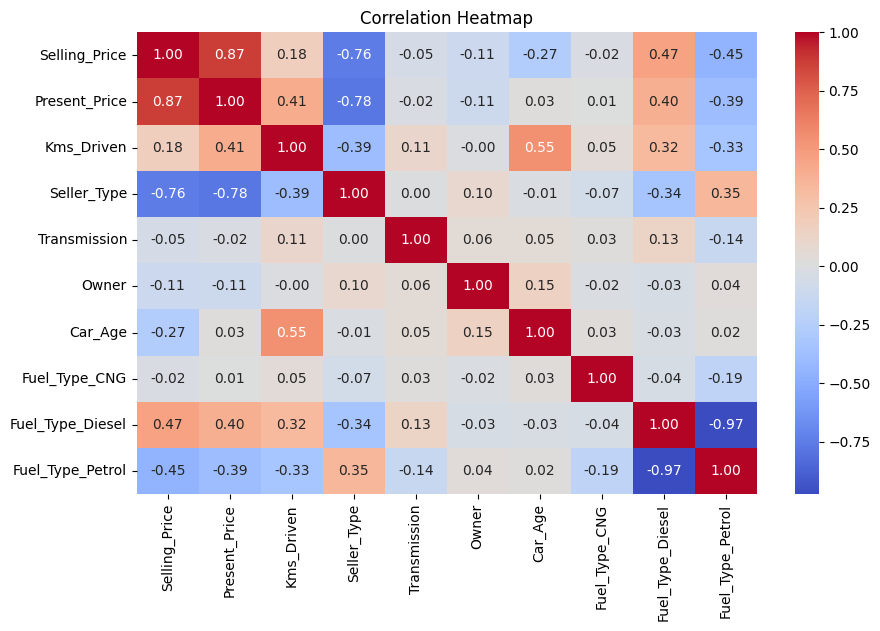

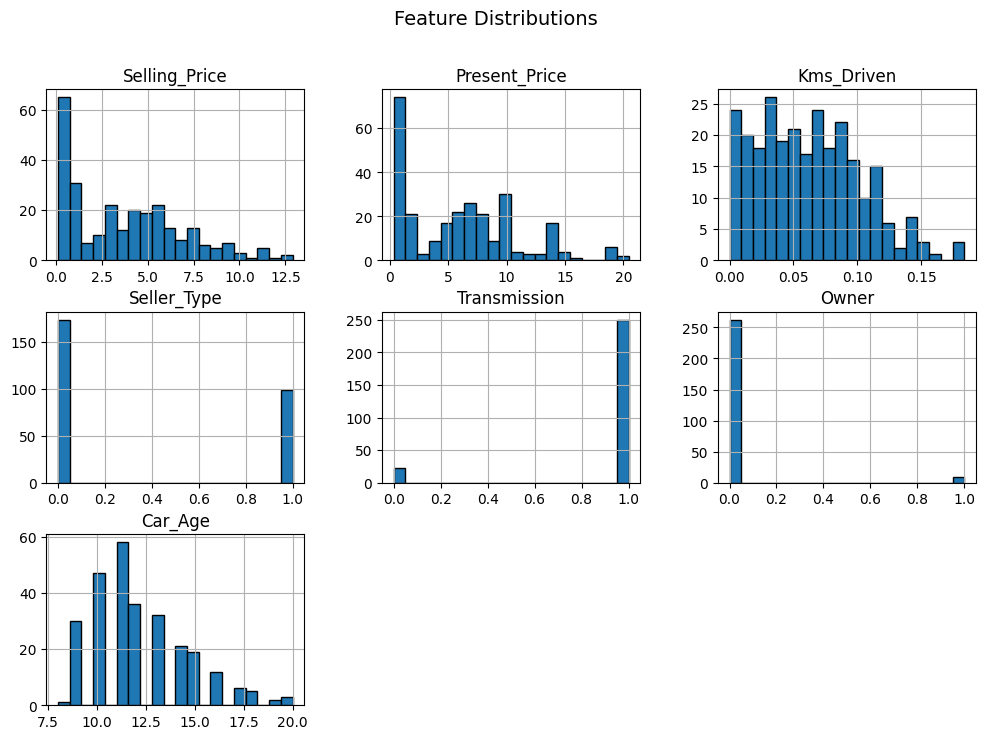

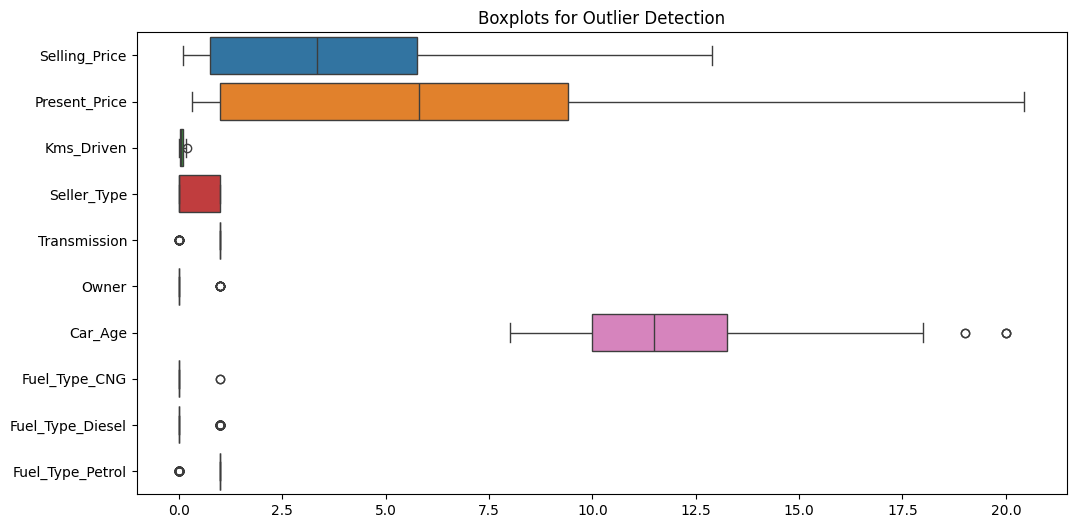

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Exploratory Data Analysis (EDA)
# Statistical Summary
print(df.describe())

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Distribution of Numerical Features
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

# Boxplots for Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplots for Outlier Detection")
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X = df.drop(columns=['Selling_Price'])  # Features
y = df['Selling_Price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train a Baseline Model (Linear Regression)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#  Model Evaluation
y_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

# Print model performance
print("Linear Regression Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")

print(f"R² Score: {r2:.2f}")

Linear Regression Model Performance:
MAE: 0.72
MSE: 1.20
R² Score: 0.89


In [9]:
from sklearn.ensemble import RandomForestRegressor
#  Train a Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#  Model Evaluation
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

# Print model performance
print("Random Forest Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")

print(f"R² Score: {r2:.2f}")

Random Forest Model Performance:
MAE: 0.47
MSE: 0.55
R² Score: 0.95
